# Introduction to pytorch
ดร. ไพรสันต์ ผดุงเวียง

College of Computing, KKU, 2024

เปลี่ยน Runtime เป็น GPU ก่อนทำงาน

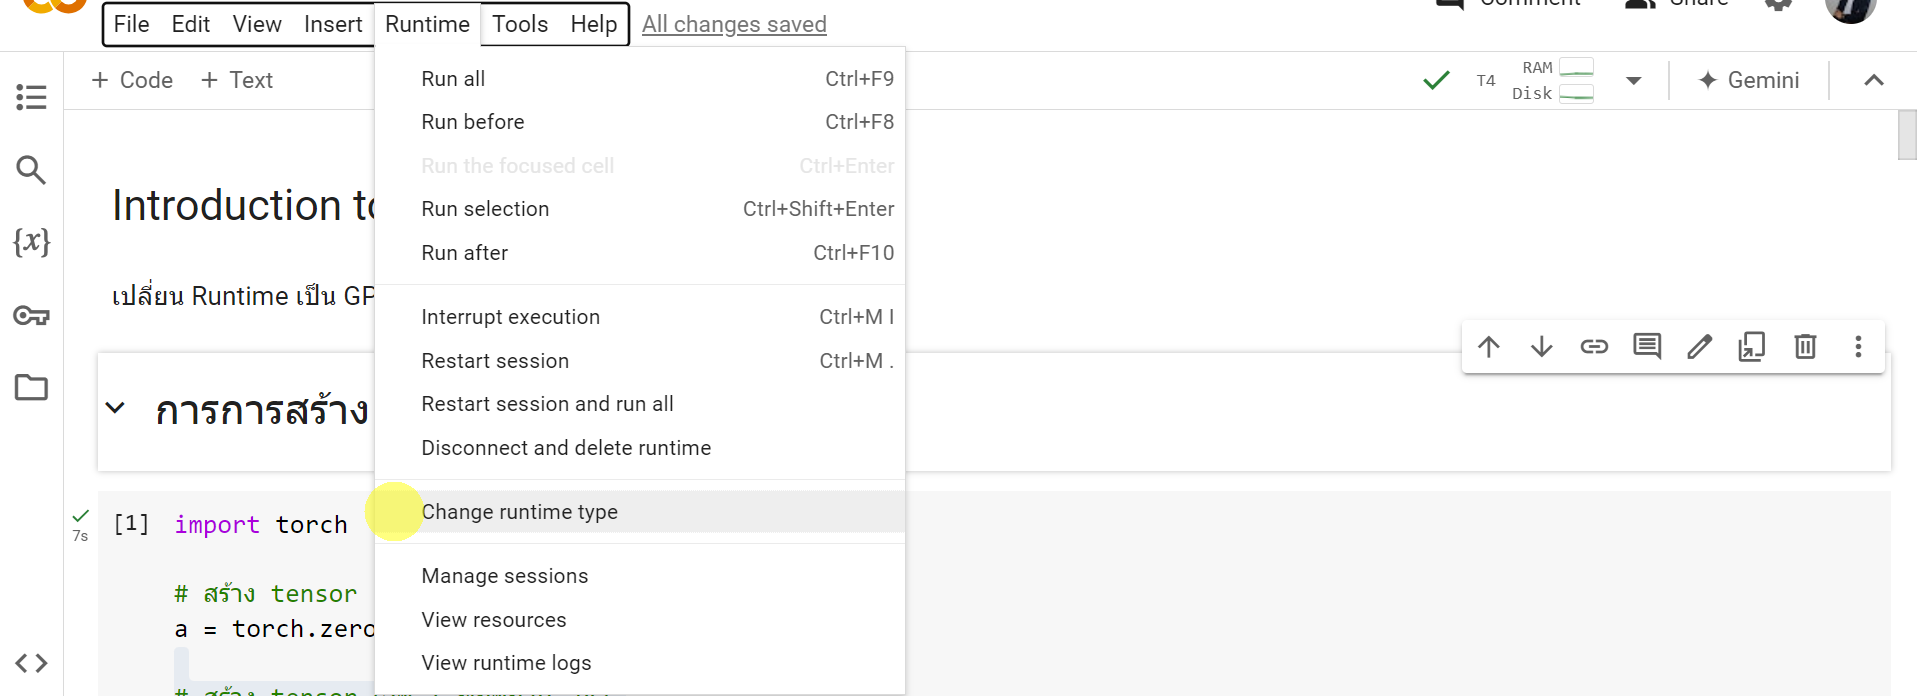


# การสร้าง Tensor ใน Pytorch

In [9]:
import torch

In [10]:
device='cuda' if torch.cuda.is_available() else 'cpu'
print('device available: ',device)

device available:  cuda


In [11]:
# สร้าง tensor เลข 0 ที่มีขนาด 2x3
a = torch.zeros(2, 3)

# สร้าง tensor เลข 1 ที่มีขนาด 2x3
b = torch.ones(2, 3)

# สร้าง tensor ด้วยการ random ที่มีขนาด 2x3
c = torch.rand(2, 3)

# สร้าง tensor จาก list
d = torch.tensor([[1, 2], [3, 4]])

In [12]:
a

tensor([[0., 0., 0.],
        [0., 0., 0.]])

การย้ายไปยัง GPU

In [13]:
a.is_cuda  # returns False

False

In [14]:
a = a.to(device)
b = b.to(device)
sum_result = a + b

In [15]:
a.is_cuda

True

# Autograd
Autograd (Automatic Differentiation) คือระบบใน PyTorch ที่ใช้ในการคำนวณ gradient หรืออนุพันธ์อัตโนมัติ สำหรับการฝึกโมเดล neural network หรือ optimization problems อื่น ๆ

## การทำงานของ Autograd
1. Forward Pass: เมื่อนำ tensor ที่มี `requires_grad=True` ไปใช้ในการคำนวณ ระบบ autograd จะจดจำทุก ๆ การคำนวณและสร้าง computational graph ขึ้นมา ใน graph นี้ nodes จะเป็น tensors และ edges จะเป็น functions ที่นำไปสู่ output

2. Backward Pass: เมื่อเรียก `.backward()` ระบบจะทำการคำนวณ gradient จาก output ไปยัง input โดยใช้ chain rule จาก calculus และ gradient ที่คำนวณได้จะถูกเก็บไว้ในแอตทริบิวต์ `.grad` ของ tensor ที่มี `requires_grad=True`

In [16]:
# Define tensors
w = torch.tensor([0.2, 0.2, 0.2, 0.2], requires_grad=True)
b = torch.tensor([0.2], requires_grad=True)

x = torch.tensor([4.0, 3.0, 2.0, 1.0])
y = torch.tensor([1.0])

print(f"w: {w}")
print(f"b: {b}")
print(f"x: {x}")
print(f"y: {y}")

w: tensor([0.2000, 0.2000, 0.2000, 0.2000], requires_grad=True)
b: tensor([0.2000], requires_grad=True)
x: tensor([4., 3., 2., 1.])
y: tensor([1.])


In [17]:
# Forward pass
z = torch.dot(w, x) + b
a = z  # f(z) = z in this case
L = 0.5 * (y - a)**2

print("Forward pass:")
print(f"z: {z}")
print(f"a: {a}")
print(f"L: {L}")

Forward pass:
z: tensor([2.2000], grad_fn=<AddBackward0>)
a: tensor([2.2000], grad_fn=<AddBackward0>)
L: tensor([0.7200], grad_fn=<MulBackward0>)


In [18]:
# Backward pass
L.backward()

print("\nBackward pass:")
print(f"dL/dw: {w.grad}")
print(f"dL/db: {b.grad}")


Backward pass:
dL/dw: tensor([4.8000, 3.6000, 2.4000, 1.2000])
dL/db: tensor([1.2000])


In [19]:
# Explanation of gradient computation
print("\nGradient computation explanation:")
print(f"1. dL/da = -(y - a) = -({y.item()} - {a.item()}) = {-(y-a).item()}")
print("2. dt/dz = 1 (since f(z) = z)")
print(f"3. dz/dw = x = {x.numpy()}")
print("4. dz/db = 1")
print(f"5. dL/dw = dL/da * dt/dz * dz/dw = {-(y-a).item()} * 1 * {x.numpy()} = {w.grad.numpy()}")
print(f"6. dL/db = dL/da * dt/dz * dz/db = {-(y-a).item()} * 1 * 1 = {-(y-a).item()}")


Gradient computation explanation:
1. dL/da = -(y - a) = -(1.0 - 2.200000047683716) = 1.2000000476837158
2. dt/dz = 1 (since f(z) = z)
3. dz/dw = x = [4. 3. 2. 1.]
4. dz/db = 1
5. dL/dw = dL/da * dt/dz * dz/dw = 1.2000000476837158 * 1 * [4. 3. 2. 1.] = [4.8       3.6000001 2.4       1.2      ]
6. dL/db = dL/da * dt/dz * dz/db = 1.2000000476837158 * 1 * 1 = 1.2000000476837158


การใช้ Autograd ทำให้เราไม่จำเป็นต้องเขียน code ในการคำนวณ gradient ด้วยตนเอง ทำให้การพัฒนาโมเดล machine learning หรือ deep learning ง่ายขึ้นและลดความผิดพลาดได้

# การสร้าง Neural network ด้วย Pytorch
การสร้าง perceptron ด้วย PyTorch สำหรับการทำ binary classification

In [20]:
# สร้างข้อมูลทดลอง
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [0], [0], [1]], dtype=torch.float32)

In [21]:
# กำหนดค่าน้ำหนักและไบแอสเริ่มต้น
input_dim = X.shape[1]
output_dim = y.shape[1]

weights = torch.randn(input_dim, output_dim, dtype=torch.float32, requires_grad=True)
bias = torch.randn(output_dim, requires_grad=True)
print(f"w: {weights}")
print(f"b: {bias}")

w: tensor([[ 0.3262],
        [-1.6489]], requires_grad=True)
b: tensor([0.7465], requires_grad=True)


In [22]:
# Activation function
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

In [23]:
# Forward pass
z = torch.mm(X,weights) + bias
a = sigmoid(z)
L = 0.5 * ((y - a)**2).sum()

print("Forward pass:")
print(f"z: {z}")
print(f"a: {a}")
print(f"L: {L}")

Forward pass:
z: tensor([[ 0.7465],
        [-0.9024],
        [ 1.0727],
        [-0.5762]], grad_fn=<AddBackward0>)
a: tensor([[0.6784],
        [0.2885],
        [0.7451],
        [0.3598]], grad_fn=<MulBackward0>)
L: 0.7542682886123657


In [24]:
# Backward pass
# weights.grad.zero_()
# bias.grad.zero_()
L.backward()

print("\nBackward pass:")
print(f"dL/dw: {weights.grad}")
print(f"dL/db: {bias.grad}")


Backward pass:
dL/dw: tensor([[-0.0060],
        [-0.0882]])
dL/db: tensor([0.2013])


In [25]:
lr=0.01
with torch.no_grad():
    weights -= lr * weights.grad
    bias -= lr * bias.grad

In [26]:
#ฝึกสอน
# Learning rate
lr = 0.1
# Training loop
epoch=1000
for epoch in range(epoch):
    # Forward pass
    linear_output = torch.mm(X, weights) + bias
    y_pred = sigmoid(linear_output)

    # sum square error
    loss = 0.5*((y-y_pred)**2).sum()

    # Backward pass และอัปเดตค่า
    loss.backward()
    with torch.no_grad():
        weights -= lr * weights.grad
        bias -= lr * bias.grad

        # ตั้งค่า gradient ให้เป็นศูนย์หลังจากทำ Backward pass
        weights.grad.zero_()
        bias.grad.zero_()

    # แสดงค่า Loss ทุก ๆ 100 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epoch}], Loss: {loss.item():.4f}')

Epoch [10/9], Loss: 0.7053
Epoch [20/19], Loss: 0.6579
Epoch [30/29], Loss: 0.6138
Epoch [40/39], Loss: 0.5742
Epoch [50/49], Loss: 0.5397
Epoch [60/59], Loss: 0.5099
Epoch [70/69], Loss: 0.4838
Epoch [80/79], Loss: 0.4605
Epoch [90/89], Loss: 0.4393
Epoch [100/99], Loss: 0.4195
Epoch [110/109], Loss: 0.4008
Epoch [120/119], Loss: 0.3830
Epoch [130/129], Loss: 0.3662
Epoch [140/139], Loss: 0.3503
Epoch [150/149], Loss: 0.3354
Epoch [160/159], Loss: 0.3215
Epoch [170/169], Loss: 0.3086
Epoch [180/179], Loss: 0.2967
Epoch [190/189], Loss: 0.2855
Epoch [200/199], Loss: 0.2752
Epoch [210/209], Loss: 0.2657
Epoch [220/219], Loss: 0.2568
Epoch [230/229], Loss: 0.2485
Epoch [240/239], Loss: 0.2407
Epoch [250/249], Loss: 0.2335
Epoch [260/259], Loss: 0.2267
Epoch [270/269], Loss: 0.2203
Epoch [280/279], Loss: 0.2143
Epoch [290/289], Loss: 0.2086
Epoch [300/299], Loss: 0.2032
Epoch [310/309], Loss: 0.1982
Epoch [320/319], Loss: 0.1933
Epoch [330/329], Loss: 0.1888
Epoch [340/339], Loss: 0.1844


In [27]:
# ทดสอบ perceptron ที่ฝึกสอนแล้ว
with torch.no_grad():
    test_data = torch.tensor([[0, 1], [1, 1], [0, 0]], dtype=torch.float32)
    test_result = sigmoid(torch.mm(test_data, weights) + bias)
    print(f'ผลการทดสอบ: {test_result.round()}')

ผลการทดสอบ: tensor([[0.],
        [1.],
        [0.]])


ผลการทดสอบ: tensor([[0.],
        [0.],
        [0.],
        [1.]])


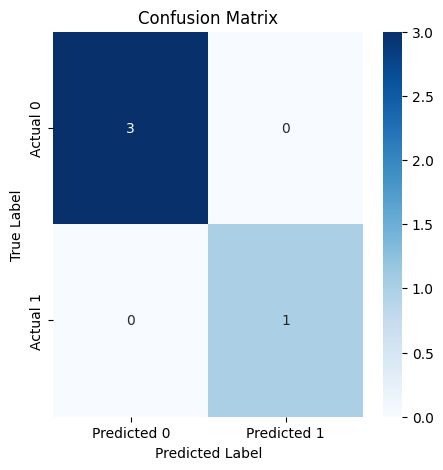

In [28]:
# prompt: Evaluate model and visualize with confusion matrix

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

test_data = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y_true = torch.tensor([[0], [0], [0], [1]], dtype=torch.float32)
y_true = y_true.numpy().flatten()
# ทดสอบ perceptron ที่ฝึกสอนแล้ว
with torch.no_grad():

    test_result = sigmoid(torch.mm(test_data, weights) + bias)
    print(f'ผลการทดสอบ: {test_result.round()}')

# สร้าง confusion matrix
y_pred = test_result.round().numpy().flatten()
cm = confusion_matrix(y_true, y_pred)

# แสดง confusion matrix ด้วย seaborn
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# สร้าง Model จาก Pytorch

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim

In [29]:
model = nn.Sequential(
    nn.Linear(X.shape[1], 10),
    nn.ReLU(),
    nn.Linear(10, y.shape[1]),
    nn.Sigmoid()
)
y.shape[1]

1

In [32]:
optimizer = optim.SGD(model.parameters(), lr=0.1) # or adam

# Loss function (ใช้ Binary Cross Entropy ในกรณีนี้)
criterion = nn.BCELoss()

In [33]:
for epoch in range(1000):
    model.train()  # กำหนดโหมดของ model เป็น training mode
    optimizer.zero_grad()  # ล้าง gradient ที่เก็บไว้

    # Forward pass
    y_pred = model(X)

    # Compute loss
    loss = criterion(y_pred, y)

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    # แสดงค่า loss ทุก 100 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/1000], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.3886
Epoch [200/1000], Loss: 0.1516
Epoch [300/1000], Loss: 0.0684
Epoch [400/1000], Loss: 0.0383
Epoch [500/1000], Loss: 0.0250
Epoch [600/1000], Loss: 0.0179
Epoch [700/1000], Loss: 0.0137
Epoch [800/1000], Loss: 0.0109
Epoch [900/1000], Loss: 0.0090
Epoch [1000/1000], Loss: 0.0076


In [34]:
print(y_pred)
1*(y_pred>0.5)

tensor([[1.6415e-05],
        [8.5729e-03],
        [8.7635e-03],
        [9.8712e-01]], grad_fn=<SigmoidBackward0>)


tensor([[0],
        [0],
        [0],
        [1]])

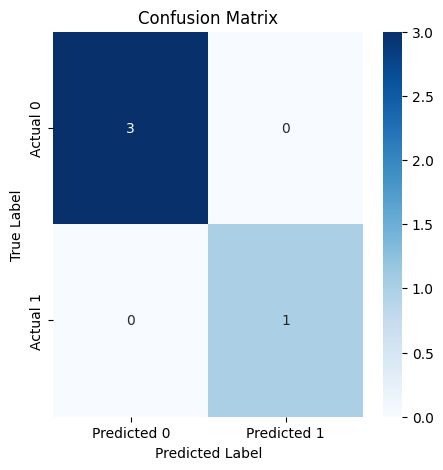

In [35]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

model.eval()
test_data = X
y_true = y
y_true = y_true.numpy().flatten()
# ทดสอบ perceptron ที่ฝึกสอนแล้ว
y_pred = model(test_data)
y_pred=y_pred.detach().numpy()
cm = confusion_matrix(y_true, y_pred>0.5)

# แสดง confusion matrix ด้วย seaborn
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Workshop 07 Hand on
1. สร้างโมเดล
2. ฝึกสอนด้วยข้อมูล X_train, y_train
3. วัดประสิทธิภาพด้วยข้อมูล  X_test, y_test

In [75]:
import pandas as pd
import numpy as np
import torch

data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
header_list = ["sepal_length","sepal_width", "petal_length", "petal_width","species"]

df = pd.read_csv(data_url,header=None,names=header_list,encoding='utf-8')

print('URL:', data_url)
df.head()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [76]:
# select data for experiment
y = df.iloc[:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)
X = df.iloc[:100, 2:4].values

In [77]:
# prompt: separate data into train and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [78]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)
# X_train.to(device)
# y_train.to(device)
# X_test.to(device)
# y_test.to(device)

In [79]:
# คำนวณ Z-score
mean = torch.mean(X_train)
std = torch.std(X_train)

X_train = (X_train - mean) / std
y_train=y_train.reshape(y_train.shape[0], 1)

X_test = (X_test - mean) / std
y_test=y_test.reshape(y_test.shape[0], 1)

## โมเดล

In [80]:
model = nn.Sequential(
    nn.Linear(X.shape[1], 10),
    nn.ReLU(),
    nn.Linear(10, 5),
    nn.ReLU(),
    nn.Linear(5, 1),
    nn.Sigmoid()
)
# model.to(device)

## ฝึกโมเดล

In [81]:
optimizer = optim.SGD(model.parameters(), lr=0.1)
# Loss function (ใช้ Binary Cross Entropy ในกรณีนี้)
criterion = nn.BCELoss()
for epoch in range(2000):
    model.train()  # กำหนดโหมดของ model เป็น training mode
    optimizer.zero_grad()  # ล้าง gradient ที่เก็บไว้

    # Forward pass
    y_pred = model(X_train)

    # Compute loss
    loss = criterion(y_pred, y_train)

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    # แสดงค่า loss ทุก 100 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/2000], Loss: {loss.item():.4f}')

Epoch [100/2000], Loss: 0.0954
Epoch [200/2000], Loss: 0.0094
Epoch [300/2000], Loss: 0.0042
Epoch [400/2000], Loss: 0.0026
Epoch [500/2000], Loss: 0.0018
Epoch [600/2000], Loss: 0.0014
Epoch [700/2000], Loss: 0.0011
Epoch [800/2000], Loss: 0.0009
Epoch [900/2000], Loss: 0.0008
Epoch [1000/2000], Loss: 0.0007
Epoch [1100/2000], Loss: 0.0006
Epoch [1200/2000], Loss: 0.0005
Epoch [1300/2000], Loss: 0.0005
Epoch [1400/2000], Loss: 0.0004
Epoch [1500/2000], Loss: 0.0004
Epoch [1600/2000], Loss: 0.0004
Epoch [1700/2000], Loss: 0.0003
Epoch [1800/2000], Loss: 0.0003
Epoch [1900/2000], Loss: 0.0003
Epoch [2000/2000], Loss: 0.0003


## วัดประสิทธิภาพ

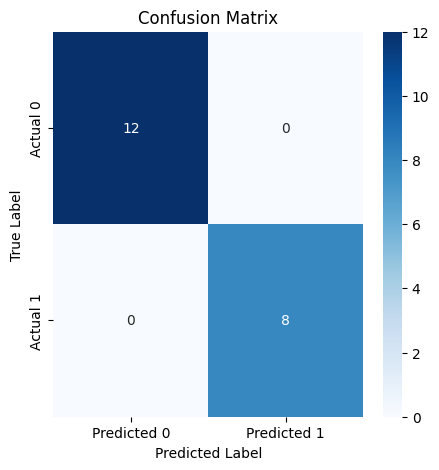

In [82]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

model.eval()
# ทดสอบ perceptron ที่ฝึกสอนแล้ว
y_pred = model(X_test)
y_pred=y_pred.detach().numpy()
cm = confusion_matrix(y_test, y_pred>0.5)

# แสดง confusion matrix ด้วย seaborn
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()